In [10]:
#Kaggle link - https://www.kaggle.com/c/santander-customer-transaction-prediction/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 9.0)

#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
null_data = train_df.isnull().sum()
print('Total null data in the training dataset is {}'.format(sum(null_data)))

Total null data in the training dataset is 0


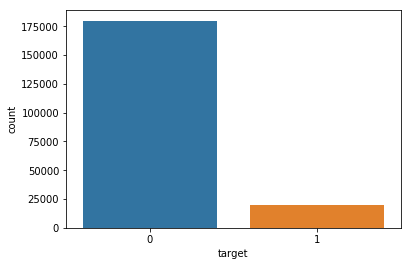

In [5]:
sns.countplot(train_df['target'])

In [6]:
bought = train_df[train_df['target'] == 1].shape[0]

print('Training dataset has {} records out of which {}% have done transaction'.format(train_df.shape[0], 100*(bought/train_df.shape[0])))

Training dataset has 200000 records out of which 10.049% have done transaction


The data is highly imbalanced. We need to balance it before training.

### Creating balanced training dataset

In [7]:
#We will use 150000 records for training and the rest for testing out model

#For training
df_train_bal = train_df[:150000]

#For testing
df_test_bal = train_df[150000:]

In [9]:
#Creating a balanced dataset with comparable counts of both the outcome classes 0 and 1
df_train_bal_0 = df_train_bal[df_train_bal['target'] == 0]
df_train_bal_1 = df_train_bal[df_train_bal['target'] == 1]

#Sample method returns a random sample of items from an axis of object.
#Selected 50000 non-transactions
df_train_bal_0 = df_train_bal_0.sample(50000)

#FInal trainign dataset with balanced records, Randomize the dataset
df_train_bal = df_train_bal_0.append(df_train_bal_1).sample(frac=1)

In [10]:
df_train_bal['target'].value_counts()

0    50000
1    15034
Name: target, dtype: int64

Above dataset looks much more balanced now.

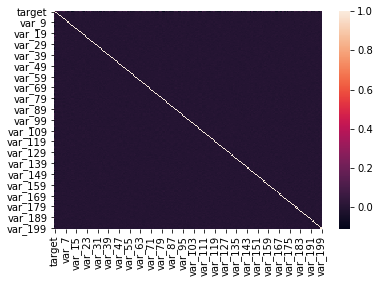

In [11]:
corr = df_train_bal.corr()
sns.heatmap(corr)

In [12]:
corr['target'].sort_values(ascending=False)

target     1.000000
var_110    0.092122
var_6      0.090128
var_53     0.088547
var_26     0.084889
var_99     0.083572
var_22     0.079418
var_190    0.078220
var_2      0.073121
var_0      0.071216
var_133    0.069270
var_1      0.067950
var_40     0.067566
var_78     0.067213
var_170    0.066974
var_179    0.065602
var_94     0.063998
var_184    0.063588
var_191    0.063281
var_18     0.062178
var_67     0.060027
var_173    0.058655
var_147    0.056633
var_35     0.056580
var_118    0.056391
var_155    0.056357
var_164    0.055821
var_95     0.055542
var_91     0.054860
var_89     0.050136
             ...   
var_192   -0.053808
var_127   -0.053810
var_177   -0.055040
var_75    -0.055655
var_122   -0.056193
var_123   -0.056692
var_86    -0.059976
var_33    -0.060361
var_154   -0.061926
var_115   -0.064836
var_108   -0.065698
var_92    -0.065794
var_149   -0.066987
var_44    -0.068902
var_109   -0.069777
var_169   -0.070540
var_198   -0.071268
var_34    -0.074433
var_148   -0.075541


In [13]:
#For training
X = df_train_bal.drop(['target','ID_code'], axis=1)
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
33337,15.8920,-2.3054,9.4243,7.5615,8.5919,2.9730,5.6979,18.0921,-3.4158,9.1416,...,9.7765,2.6653,0.9416,10.1628,21.6038,-2.3134,10.0943,8.1013,16.3791,-4.8942
9357,7.7026,-3.3229,11.9153,5.3250,10.5142,14.5036,6.8164,22.4341,1.7733,7.5687,...,-1.5670,7.4383,3.6568,9.1971,19.5061,0.6698,5.7941,7.6710,12.8606,7.3971
128353,13.5145,7.1729,7.0120,4.9944,12.2276,-18.8185,5.5033,17.7854,3.6499,6.8845,...,-2.9050,16.0522,1.2570,0.5772,19.6891,-1.2766,5.1475,7.3567,8.3428,-18.6583
93949,11.6153,-6.1419,14.2519,7.7899,13.4526,8.8773,3.9843,16.6901,-2.0119,8.6138,...,0.1340,7.8234,2.6824,-0.8922,13.7949,0.7910,1.3107,7.8264,15.5821,-7.4323
83741,11.8926,-7.4940,9.6639,6.2194,9.7373,5.9583,6.2264,15.3011,-4.2126,7.8078,...,4.2484,10.5163,1.9321,3.4489,22.3412,0.8217,11.8180,9.6953,21.9996,4.4245


In [14]:
y = df_train_bal.iloc[:,1:2]

print('Unique target values are :')
print(y['target'].value_counts())

Unique target values are :
0    50000
1    15034
Name: target, dtype: int64


In [15]:
#For testing
X_test = df_test_bal.drop(['target','ID_code'], axis=1)

y_test = df_test_bal.iloc[:,1:2]

In [165]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
lr_model.score(X_test, y_test)

0.89762

In [167]:
#Cross Validation
from sklearn.model_selection import cross_val_score

# Perform 6-fold cross validation
scores = cross_val_score(lr_model, X_test, y_test, cv=6)

print('Cross-validated scores:', scores)

Cross-validated scores: [0.91180706 0.91492681 0.91371655 0.91203648 0.9175567  0.91455658]


##  Applying PCA

In [144]:
X_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,10.681826,-1.622207,10.710379,6.795436,11.078648,-5.063380,5.408850,16.548338,0.288362,7.569283,...,3.245415,7.428888,1.926534,3.332547,17.994988,-0.142003,2.317369,8.907999,15.872781,-3.321000
std,3.042205,4.049797,2.644893,2.044414,1.621825,7.859184,0.867221,3.417978,3.332235,1.235214,...,4.565031,3.023443,1.477320,3.998930,3.135515,1.429746,5.461107,0.920997,3.013007,10.441408
min,0.408400,-15.043400,2.582500,0.016200,5.074800,-32.562600,2.347300,5.349700,-10.505500,4.186100,...,-13.999500,-2.691700,-3.814500,-11.783400,8.694400,-5.154700,-14.020400,5.960600,6.299300,-38.852800
25%,8.453575,-4.733600,8.714775,5.251200,9.884400,-11.198500,4.766800,13.949075,-2.311400,6.619700,...,-0.053900,5.146250,0.889600,0.578875,15.628975,-1.172800,-1.937325,8.251600,13.832400,-11.185600
50%,10.527900,-1.603500,10.568300,6.825600,11.108100,-4.825300,5.384000,16.458850,0.396950,7.631600,...,3.211350,7.334850,1.898100,3.393050,17.956100,-0.171450,2.432000,8.888000,15.932900,-2.816600
75%,12.763600,1.362450,12.515200,8.320500,12.259000,0.920125,6.005425,19.108300,2.935800,8.587125,...,6.415525,9.503200,2.947300,6.219050,20.392300,0.830800,6.582325,9.591300,18.071700,4.837200
max,20.315000,10.376800,18.652100,13.098300,16.671400,17.251600,8.447700,27.691800,10.151300,11.143500,...,18.440900,16.716500,8.402400,18.281800,27.528400,4.272900,18.321500,12.000400,26.034600,28.500700


In [133]:
#Feature Scaling before PCA is required
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_norm = sscaler.fit_transform(X_train)
X_test_norm = sscaler.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
# X_train_pca = pca.fit_transform(X_train_norm)
# X_test_pca = pca.transform(X_test_norm)

X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)

In [18]:
pca.explained_variance_ratio_

array([7.09966749e-02, 3.08641306e-02, 2.73812744e-02, 2.68552499e-02,
       2.48505930e-02, 2.27758980e-02, 2.22815468e-02, 2.10133332e-02,
       2.07922910e-02, 2.00552700e-02, 1.83413243e-02, 1.72996511e-02,
       1.69870570e-02, 1.68274717e-02, 1.67597253e-02, 1.37311918e-02,
       1.29973768e-02, 1.24961148e-02, 1.23579882e-02, 1.21040025e-02,
       1.18079231e-02, 1.15970280e-02, 1.13689614e-02, 1.13196759e-02,
       1.11677676e-02, 1.10084426e-02, 1.08077325e-02, 1.06291674e-02,
       1.05873782e-02, 1.04248205e-02, 1.00989387e-02, 9.94769973e-03,
       9.79302049e-03, 9.70727146e-03, 9.64192721e-03, 9.61098478e-03,
       9.57460707e-03, 9.46635943e-03, 9.42289771e-03, 9.31497513e-03,
       9.09534823e-03, 9.02848823e-03, 8.79962321e-03, 8.71489245e-03,
       8.62050774e-03, 8.57488839e-03, 8.43504663e-03, 7.95761578e-03,
       7.03410224e-03, 6.95483823e-03, 6.03029882e-03, 6.00857964e-03,
       5.93969007e-03, 5.78010513e-03, 5.62486579e-03, 5.56959438e-03,
      

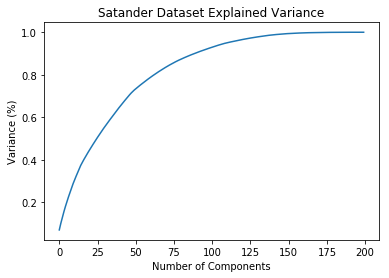

In [19]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Satander Dataset Explained Variance')
plt.show()

PCA is not much helpful in this case as all features have almost the same variance.

### GridSearch for Hyperparameter optimization

In [173]:
#Grid Search to find optinal parameters
from sklearn.model_selection import GridSearchCV

#parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
parameters = {'C': [0.001, 0.01, 0.1, 1, 10] }
classifier = LogisticRegression()

grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                          cv = 10,
                          n_jobs=-1)

grid_search = grid_search.fit(X, y)

In [174]:
best_accuracy = grid_search.best_score_

best_accuracy

0.8377002798536151

In [175]:
best_parameters = grid_search.best_params_

best_parameters

{'C': 10}

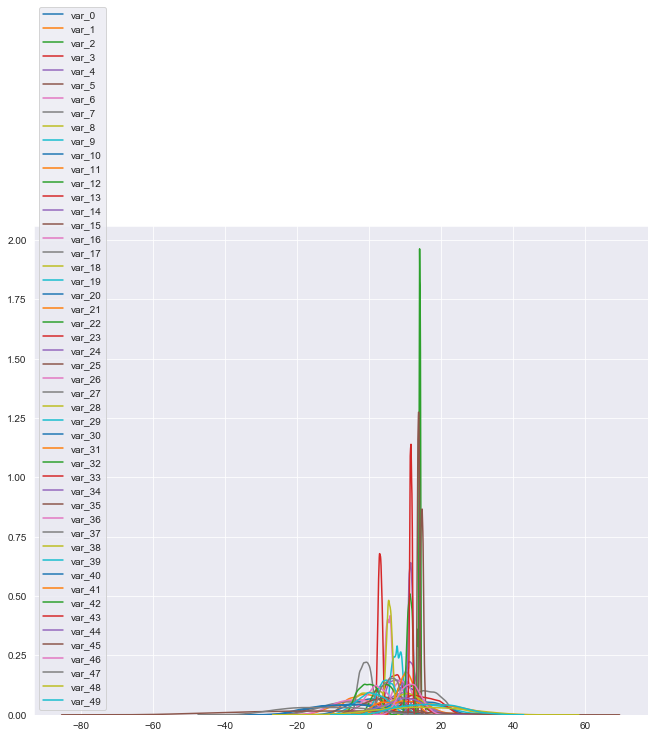

In [207]:
#Checking for first 50 features
for i in range(50):
    sns.kdeplot(X['var_{}'.format(i)])

In [224]:
#Feature Scaling before PCA is required
from sklearn.preprocessing import StandardScaler

features = X.columns
sscaler = StandardScaler()

X_train_norm = sscaler.fit_transform(X)
X_test_norm = sscaler.transform(X_test_df)

#Coveting array back to Dataframe
X_train_norm = pd.DataFrame(X_train_norm, columns=features)
X_test_norm = pd.DataFrame(X_test_norm, columns=features)

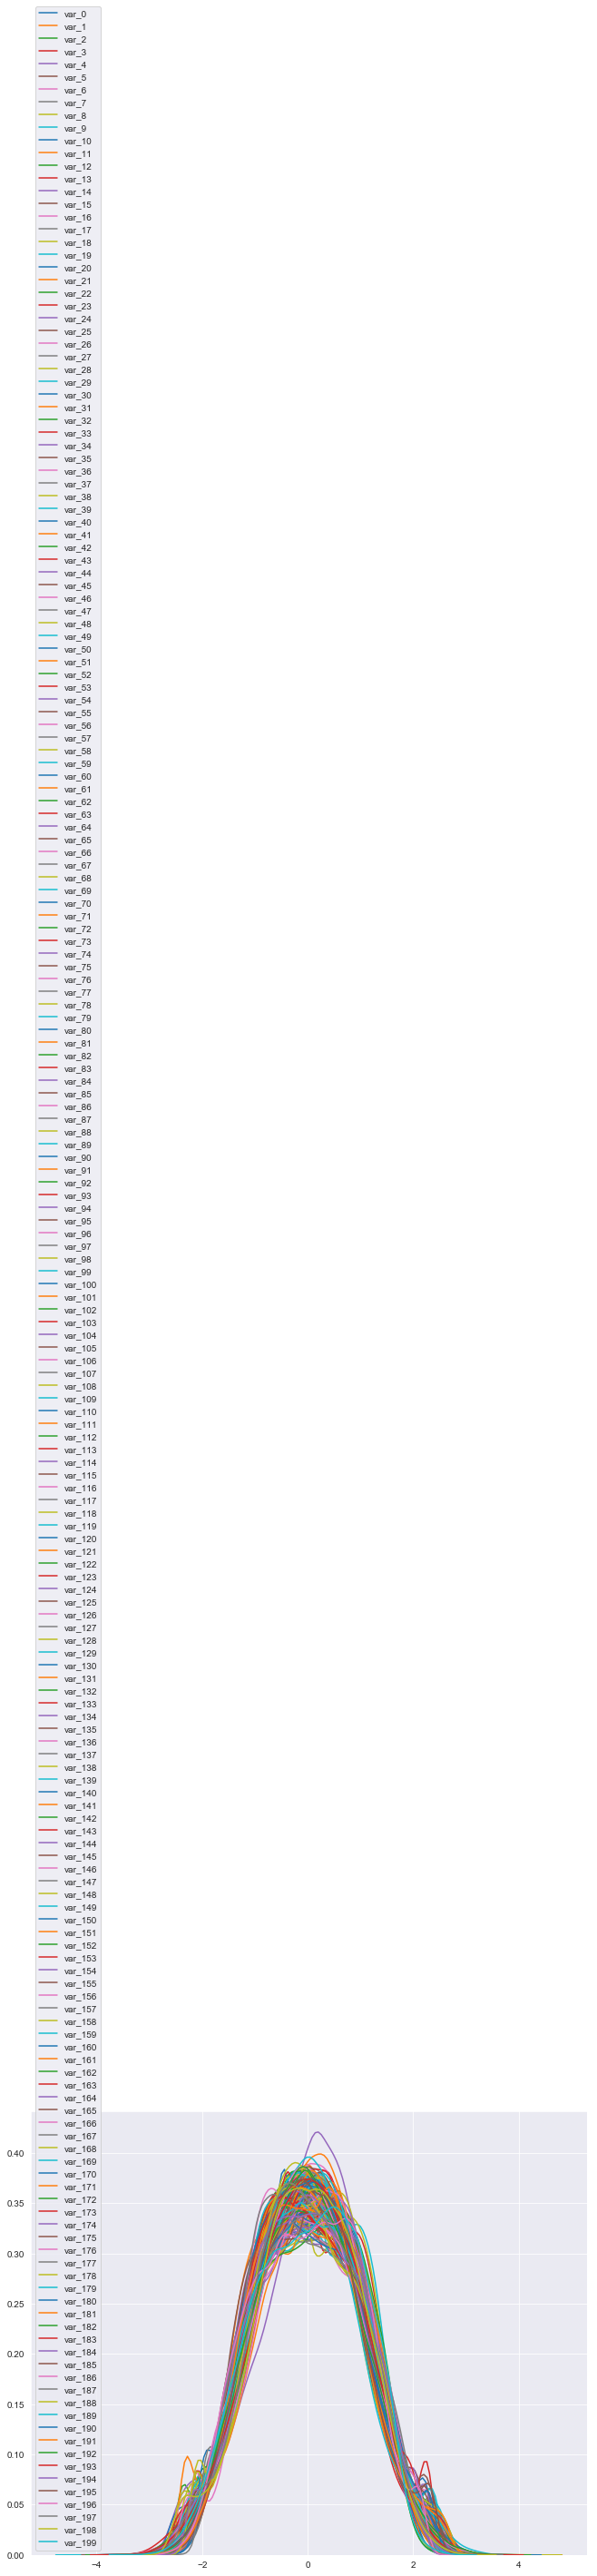

In [209]:
for i in range(200):
    sns.kdeplot(X_train_norm['var_{}'.format(i)])

In [210]:
#Applying best param to LR model
lr_model_best = LogisticRegression(C=10)
lr_model_best.fit(X_train_norm, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [211]:
#Cross Validation of Best Model
from sklearn.model_selection import cross_val_score

# Perform 6-fold cross validation
scores = cross_val_score(lr_model_best, X_test, y_test, cv=6)

print('Cross-validated scores:', scores)

Cross-validated scores: [0.91156707 0.91492681 0.91287652 0.91203648 0.91707668 0.91443658]


### Appying Boosting

In [231]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train_norm, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=20, n_estimators=120, learning_rate=0.1)
gbrt.fit(X_train_norm, y)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_test_norm)]

bst_n_estimators = np.argmin(errors)
print('Best number of estimatores is : {}'.format(bst_n_estimators))

In [ ]:
gbrt_best = GradientBoostingClassifier(max_depth=20,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train_norm, y)

y_pred = gbrt_best.predict(X_test_norm)

acc_score = accuracy_score(y_test, y_pred)
print('Accuracy for best fit model is {}'.format(acc_score))

print(y_pred)

In [ ]:
## TO DO
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## On Test Dataset

In [225]:
#X_test_norm = X_test_norm.drop('ID_code', axis=1)

#Applying PCA on test dataset
#X_test_df_pca = pca.transform(X_test_df)

In [226]:
#test_pred = randomforest_clf.predict(X_test_df_pca)
test_pred = lr_model_best.predict(X_test_norm)

In [227]:
submission = pd.DataFrame({
        "ID_code": test_df["ID_code"],
        "target": test_pred
    })

In [228]:
submission.to_csv('submission.csv', index=False)

In [229]:
submitted = pd.read_csv('submission.csv')
submitted.head(10)

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,0
8,test_8,0
9,test_9,0


In [ ]:
submitted['target'].value_counts()